## Project 3
- Harshvardhan
- Student Id: 609162

Task 1: Implement both supervised and unsupervised dimensionality approaches (FLD and PCA). Only the pima dataset is used.

- (20 pts) Denote the standardized normalized dataset as nX. You need to prepare three projected datasets from nX for later classification purpose.
+ fX: the projected data from FLD. You should realize since pima only has c=2 classes, the number of dimensions it will reduce to should be m = c - 1 = 1 dimension.
+ pX1: the projected data from PCA (only keep the major axis, i.e., the eigenvector that corresponds to the largest eigenvalue). Calculate the error rate introduced by pX1.
+ pX: the projected data from PCA assuming the error rate you can tolerate is no greater than 15%. How many dimensions need to be kept?
+ Plot a 1 x 2 figure showing the histogram of fX and pX1. Do they look like Gaussian to you? Comment on what distribution you think would be appropriate to describe these 1-D datasets? This should give you some hint on if non-parametric learning might be a better option or not.
- (35 pts) Apply both Case 3 and kNN on nX, fX, px1, and pX. Use the "k" where you obtain the best performance on nX in Project 2.
+ Draw two tables of 4 rows and 4 columns that measures overall accuracy, classwise accuracy, and runtime. Assuming 1:3 prior probability.
+ Generate 8 confusion matrices, i.e., the two classifiers on the four datasets. (need to generate them yourself)
+ Plot ROC curves (in the same figure) using only pX. (Note that the different points on the curves should be generated by changing the prior probabilities)

In [108]:
import numpy as np
import time as t
import matplotlib.pyplot as plt
import random

# for handling images
from skimage import io
import numpy.matlib
import scipy.misc

In [109]:
# function for FLD
def fld(x, y, nclass = 2):
    
    mu0 = np.mean(x[y==0,:], axis = 0)
    mu1 = np.mean(x[y==1,:], axis = 0)
    
    n0 = len(y) - np.sum(y)
    n1 = np.sum(y)
    
    x0 = x[y==0]
    x1 = x[y==1]
    
    #within class scatter matrix
    s0 = np.zeros((len(mu0), len(mu0)))
    for i in range(n0):
        s0 = s0 + np.outer(x0[i] - mu0, x0[i] - mu0)
    
    
    s1 = np.zeros((len(mu1), len(mu1)))
    for i in range(n1):
        s1 = s1 + np.outer(x1[i] - mu1, x1[i] - mu1)
        
    sw = s0 + s1
    
    sw_inv = np.linalg.inv(sw)
    
    w = np.matmul(sw_inv, (mu0-mu1))
    
    l = x.shape[0]
    x_proj = np.zeros(l)
    
    #saving projections
    for i in range(x.shape[0]):
        x_proj[i] = np.dot(w, x[i,:])
    
    return x_proj

In [110]:
def pca(x, k = 2):
    # k is the number of eigen vectors to use
    mu = np.mean(x, axis = 0)
    sigma = np.cov(x.T)
    #print(sigma.shape)
    e_val , e_vec = np.linalg.eigh(sigma)
    
    #sort the eigenvalues in descending order
    index = np.argsort(e_val)[::-1]
    sorted_eigenvalue = e_val[index]
    
    # sorting PCA similarly
    sorted_eigenvectors = e_vec[index,:]
    
    # selecting desied number of dimensions
    eigenvectors_subset = sorted_eigenvectors[range(k),]
    
    #print(sorted_eigenvalue)
    
    #saving projections
    l = x.shape[0]
    m = eigenvectors_subset.shape[1]
    
    x_proj = np.zeros((l,m))
    
    #for i in range(x.shape[0]):
    #    x_proj[i] = np.dot(eigenvectors_subset.transpose(),x[i,:])
    # this not sure!!!!!______________________________________________________
    x_proj = np.dot(x,eigenvectors_subset.transpose())
    
    # information lost in PCA (error)
    e = 1-sum(sorted_eigenvalue[:k])/sum(sorted_eigenvalue)
    
    return x_proj, e

In [111]:
# Loading data
train = np.loadtxt("/Users/harsh/Downloads/pima.tr.txt",skiprows=1)
train_x = train[:,:-1]
train_y = train[:,-1].astype(int)

# Normalise train_x
train_x1 = (train_x - train_x.mean(0))/train_x.std(0) #saving it in a new variable as we still need train_x1 for normalising test_x

test_data = np.loadtxt("/Users/harsh/Downloads/pima.te.txt",skiprows=1)
test_x = test_data[:,:-1]
test_y = test_data[:,-1].astype(int)

# normalise test_x
test_x = (test_x - train_x.mean(0))/train_x.std(0)

#assigning train_x1 to train_x
train_x = train_x1

print(train_x.shape)

(200, 7)


In [112]:
fld(train_x, train_y)

array([ 9.76349402e-03, -1.51032316e-02,  8.92071796e-03, -7.73996882e-03,
        1.27158500e-02, -1.09874810e-03,  9.88783613e-03, -9.01780194e-03,
       -7.92399140e-03, -1.08852397e-02, -2.25020598e-02, -8.47110362e-03,
       -1.56627280e-02, -5.07020064e-03,  1.59118935e-03,  1.27419660e-02,
        4.66473951e-03, -1.18980308e-02, -3.26234022e-03,  8.19598926e-03,
        1.33854178e-02,  3.80617106e-03,  9.50104695e-03,  1.52155048e-02,
        8.89168333e-03, -1.35279867e-02,  1.03007937e-02, -2.55055533e-03,
        2.41822609e-03,  2.48781748e-03,  5.64432126e-03,  1.51976291e-04,
        4.16499545e-03, -2.16002283e-03,  2.49426885e-03, -9.63584192e-03,
        1.38413296e-02,  1.92249791e-02,  6.47910240e-03,  4.92081006e-03,
       -1.88372283e-02,  4.72398789e-03,  1.15149913e-06,  1.59671641e-02,
        1.16826743e-02,  3.83816390e-03,  1.56888872e-03, -9.64690256e-04,
       -4.19257292e-03, -2.26678498e-02,  9.40408607e-03,  1.05311356e-02,
       -1.11003169e-02,  

In [113]:
pca(train_x)

(array([[ 1.06681714e+00, -5.08390266e-02],
        [-2.35794806e+00, -5.90476416e-01],
        [ 9.44284145e-01,  9.99473905e-01],
        [-6.20381890e-01,  2.61907398e+00],
        [-4.38371673e-01, -8.58967642e-03],
        [-1.76132253e-01,  3.23890636e-01],
        [ 8.70695419e-01,  8.74855897e-01],
        [-1.58287329e+00, -1.00173383e+00],
        [-2.25822198e+00, -2.90489805e-01],
        [ 1.11065114e+00,  3.88544751e-01],
        [ 1.62072689e+00, -3.63608311e-01],
        [-7.34399159e-01, -7.83562082e-02],
        [-3.05001635e+00, -2.05515159e-01],
        [ 1.27409864e+00, -1.88255691e+00],
        [ 1.63545347e+00,  1.35461668e+00],
        [ 2.95403273e-01, -1.26989761e+00],
        [ 4.18026433e-01, -1.82430326e+00],
        [-1.26238621e-01,  1.93399344e-01],
        [-1.48492006e+00, -1.53118802e-01],
        [-1.10470398e+00, -9.73308023e-01],
        [-3.03894364e-01, -1.45207599e+00],
        [-3.75471775e-01,  1.63930052e-01],
        [ 4.24752186e-01, -7.538

In [114]:
# finding error tolerance vs k
err = []
for i in range(train_x.shape[1]+1):
    err.append(pca(train_x, i)[1])
print(err)
pca(train_x, 5)[1]

[1.0, 0.655819832754988, 0.4420416289454192, 0.3117748265852859, 0.19749323339975378, 0.09890249052449862, 0.0432141152613853, 0.0]


0.09890249052449862

It is noted that using 5 principal components gives 9% errors, which is less that 15% threshold. Using fewer principal components will give 19.7% error which is higher than what we want. Thus, we will use five principal components

### Task 1 Note
Because we only have initial training set, we will only use that numpy array to calculate the linear discriminant weights and the principal components.

In [115]:
nX_train = train_x.copy
fX_train = fld(train_x, train_y).reshape((train_x.shape[0],1))
pX1_train = pca(train_x, k = 1)[0].reshape((train_x.shape[0],1))
pX_train = pca(train_x, k = 5)[0]

nX_test = test_x.copy
fX_test = fld(test_x, test_y).reshape((test_x.shape[0],1))
pX1_test = pca(test_x, k = 1)[0].reshape((test_x.shape[0],1))
pX_test = pca(test_x, k = 5)[0]

In [116]:
print(fX_train.shape)

(200, 1)


Text(0.5, 1.0, 'Histogram of pX1')

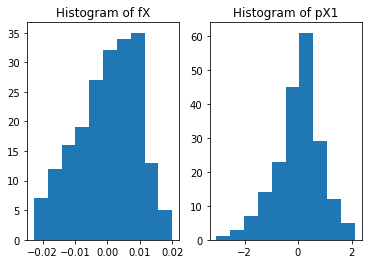

In [117]:
# histogram of fX and pX1
plt.subplot(1, 2, 1)
plt.hist(fX_train)
plt.title("Histogram of fX")

plt.subplot(1, 2, 2)
plt.hist(pX1_train)
plt.title("Histogram of pX1")

pX1 might look like a Normal distribution with very low kurtosis. However, fX is not Normal looking. It probably makes more sense to apply a non-parametric method like kNN in this case to the data.

## Applying Case 3 (Quadratic Classifier) and kNN on nX, fX, pX1 and pX

In [118]:
# Case 3 (Quadratic Classifier)
def bayes_classifier(xtrain, ytrain, xtest, ytest, pw):
    t1 = t.time()
    
    pw0 = pw
    pw1 = 1-pw

    nn, nf = xtest.shape

    # for class 0
    arr = xtrain[ytrain == 0]
    covs0 = np.cov(np.transpose(arr))
    means0 = np.mean(arr, axis = 0)

    # for class 1
    arr = xtrain[ytrain == 1]
    covs1 = np.cov(np.transpose(arr))
    means1 = np.mean(arr, axis = 0)

    # initialising yhat array
    yhat = np.ones(len(ytest))
    
    if xtrain.shape[1] == 1:
        for i in range(len(ytest)):
            d = (xtest[i]-means0)*(xtest[i]-means0) * -0.5/covs0
            g0 = -0.5*np.log(covs0) + d + np.log(pw0)

            d = (xtest[i]-means1)*(xtest[i]-means1) * -0.5/covs1
            g1 = -0.5*np.log(covs1) + d + np.log(pw1)        

            # if g0>g1, then i belongs to 0, else to 1
            if(g0>g1):
                yhat[i] = 0 

    else:
        for i in range(len(ytest)):
            d = np.matmul(np.matmul(xtest[i]-means0, np.linalg.inv(covs0)), xtest[i]-means0) * -0.5
            g0 = -0.5*np.log(np.linalg.det(covs0)) + d + np.log(pw0)

            d = np.matmul(np.matmul(xtest[i]-means1, np.linalg.inv(covs1)), xtest[i]-means1) * -0.5
            g1 = -0.5*np.log(np.linalg.det(covs1)) + d + np.log(pw1)        

            # if g0>g1, then i belongs to 0, else to 1
            if(g0>g1):
                yhat[i] = 0
            
    overall_acc = np.sum(yhat == ytest)/len(ytest)
    class0_acc = np.sum(yhat[ytest == 0] == 0)/np.sum(ytest == 0)
    class1_acc = np.sum(yhat[ytest == 1] == 1)/np.sum(ytest == 1)
    
    t2 = t.time()
    tt = t2-t1
    
    return yhat, overall_acc, class0_acc, class1_acc, tt

In [119]:
# kNN

# Euclidean distance function for kNN
def euclid(x1, x2):
    return (np.sqrt(np.dot(x1 - x2, x1 - x2)))

def knn_classifier(xtrain, ytrain, xtest, ytest, k):
    
    t1 = t.time()
    
    # initialising yhat array
    yhat = np.ones(len(ytest))
    
    for i in range(xtest.shape[0]):
        xti = xtest[i]
        d1 = np.zeros(xtrain.shape[0])
        
        # calculating distance between xti and all the other points
        for j in range(xtrain.shape[0]):
            d1[j] = euclid(xti, xtrain[j])
        
        # finding index of largest k points
        l = d1.argsort()[:k]
        
        # majority voting
        if (np.sum(ytrain[l])>k/2):
            yhat[i] = 1
        else:
            yhat[i] = 0
    
    
    overall_acc = np.sum(yhat == ytest)/len(ytest)
    class0_acc = np.sum(yhat[ytest == 0] == 0)/np.sum(ytest == 0)
    class1_acc = np.sum(yhat[ytest == 1] == 1)/np.sum(ytest == 1)
    
    t2 = t.time()
    tt = t2-t1
    
    return yhat, overall_acc, class0_acc, class1_acc, tt

In [120]:
###### Case 3 Classifier
# Prior probability ratio is 1:3. pw1/pw2 = 1/3.

# With nX
a, b, c, d, e = bayes_classifier(train_x, train_y, test_x, test_y, 0.25)
print("\nOverall accuracy: ", b, "\nClass-0 Accuracy: ", c, "\nClass-1 Accuracy: ", d, "\nRuntime: ", e)

# With fX
a, b, c, d, e = bayes_classifier(fX_train, train_y, fX_test, test_y, 0.25)
print("\nOverall accuracy: ", b, "\nClass-0 Accuracy: ", c, "\nClass-1 Accuracy: ", d, "\nRuntime: ", e)

# With pX
a, b, c, d, e = bayes_classifier(pX_train, train_y, pX_test, test_y, 0.25)
print("\nOverall accuracy: ", b, "\nClass-0 Accuracy: ", c, "\nClass-1 Accuracy: ", d, "\nRuntime: ", e)

# With pX1
a, b, c, d, e = bayes_classifier(pX1_train, train_y, pX1_test, test_y, 0.25)
print("\nOverall accuracy: ", b, "\nClass-0 Accuracy: ", c, "\nClass-1 Accuracy: ", d, "\nRuntime: ", e)


Overall accuracy:  0.7108433734939759 
Class-0 Accuracy:  0.6502242152466368 
Class-1 Accuracy:  0.8348623853211009 
Runtime:  0.029980897903442383

Overall accuracy:  0.6144578313253012 
Class-0 Accuracy:  0.43946188340807174 
Class-1 Accuracy:  0.9724770642201835 
Runtime:  0.008222818374633789

Overall accuracy:  0.39457831325301207 
Class-0 Accuracy:  0.21076233183856502 
Class-1 Accuracy:  0.7706422018348624 
Runtime:  0.026235103607177734

Overall accuracy:  0.32831325301204817 
Class-0 Accuracy:  0.0 
Class-1 Accuracy:  1.0 
Runtime:  0.007664918899536133


### Table for Case 3
|     | Overall Accuracy | Class-0 Accuracy | Class-1 Accuracy | Runtime |
|-----|------------------|------------------|------------------|---------|
| nX  | 0.710            | 0.650            | 0.834            | 0.029   |
| fX  | 0.614            | 0.439            | 0.972            | 0.018   |
| pX1 | 0.394            | 0.210            | 0.770            | 0.044   |
| pX  | 0.328            | 0.0              | 1.0              | 0.009   |

In [121]:
###### kNN

# for nX
a, b, c, d, e = knn_classifier(train_x, train_y, test_x, test_y, 9)
print("\nOverall accuracy: ", b, "\nClass-0 Accuracy: ", c, "\nClass-1 Accuracy: ", d, "\nRuntime: ", e)

# for fX
a, b, c, d, e = knn_classifier(fX_train, train_y, fX_test, test_y, 9)
print("\nOverall accuracy: ", b, "\nClass-0 Accuracy: ", c, "\nClass-1 Accuracy: ", d, "\nRuntime: ", e)

# For pX
a, b, c, d, e = knn_classifier(pX_train, train_y, pX_test, test_y, 9)
print("\nOverall accuracy: ", b, "\nClass-0 Accuracy: ", c, "\nClass-1 Accuracy: ", d, "\nRuntime: ", e)

# For pX1
a, b, c, d, e = knn_classifier(pX1_train, train_y, pX1_test, test_y, 9)
print("\nOverall accuracy: ", b, "\nClass-0 Accuracy: ", c, "\nClass-1 Accuracy: ", d, "\nRuntime: ", e)


Overall accuracy:  0.7650602409638554 
Class-0 Accuracy:  0.8923766816143498 
Class-1 Accuracy:  0.5045871559633027 
Runtime:  0.4026188850402832

Overall accuracy:  0.7590361445783133 
Class-0 Accuracy:  0.8834080717488789 
Class-1 Accuracy:  0.5045871559633027 
Runtime:  0.7217669486999512

Overall accuracy:  0.6626506024096386 
Class-0 Accuracy:  0.8161434977578476 
Class-1 Accuracy:  0.3486238532110092 
Runtime:  0.6210718154907227

Overall accuracy:  0.6475903614457831 
Class-0 Accuracy:  0.8161434977578476 
Class-1 Accuracy:  0.30275229357798167 
Runtime:  0.44113898277282715


### Table for kNN
|     | Overall Accuracy | Class-0 Accuracy | Class-1 Accuracy | Runtime |
|-----|------------------|------------------|------------------|---------|
| nX  | 0.765            | 0.892            | 0.504            | 0.358   |
| fX  | 0.759            | 0.883            | 0.504            | 0.388   |
| pX1 | 0.647            | 0.816            | 0.302            | 0.527   |
| pX  | 0.663            | 0.816            | 0.348            | 0.313   |

In [122]:
# Function for confusion matrix
def confusion(actual, predicted, k = 2):

    classes = range(k) # class labels
    conf_mat = np.zeros((len(classes), len(classes))) # initialize the confusion matrix

    for i in range(len(classes)):
        for j in range(len(classes)):
            conf_mat[i, j] = np.sum((actual == classes[i]) & (predicted == classes[j]))
    return conf_mat

In [123]:
### Confusion Matrices
# For Case 3

# With nX
a, b, c, d, e = bayes_classifier(train_x, train_y, test_x, test_y, 0.25)
print(confusion(test_y, a))

# With fX
a, b, c, d, e = bayes_classifier(fX_train, train_y, fX_test, test_y, 0.25)
print(confusion(test_y, a))

# With pX
a, b, c, d, e = bayes_classifier(pX_train, train_y, pX_test, test_y, 0.25)
print(confusion(test_y, a))

# With pX1
a, b, c, d, e = bayes_classifier(pX1_train, train_y, pX1_test, test_y, 0.25)
print(confusion(test_y, a))

[[145.  78.]
 [ 18.  91.]]
[[ 98. 125.]
 [  3. 106.]]
[[ 47. 176.]
 [ 25.  84.]]
[[  0. 223.]
 [  0. 109.]]


In [124]:
# For kNN

# for nX
a, b, c, d, e = knn_classifier(train_x, train_y, test_x, test_y, 9)
print(confusion(test_y, a))

# for fX
a, b, c, d, e = knn_classifier(fX_train, train_y, fX_test, test_y, 9)
print(confusion(test_y, a))

# For pX
a, b, c, d, e = knn_classifier(pX_train, train_y, pX_test, test_y, 9)
print(confusion(test_y, a))

# For pX1
a, b, c, d, e = knn_classifier(pX1_train, train_y, pX1_test, test_y, 9)
print(confusion(test_y, a))

[[199.  24.]
 [ 54.  55.]]
[[197.  26.]
 [ 54.  55.]]
[[182.  41.]
 [ 71.  38.]]
[[182.  41.]
 [ 76.  33.]]


In [125]:
# Plotting ROC curves for pX only
tpr_case3 = []
fpr_case3 = []

tpr_kNN = []
fpr_kNN = []

l = np.linspace(0.01,0.99,num = 20)

for i in l:
    tpr_case3.append(bayes_classifier(pX_train, train_y, pX_test, test_y, i)[3])
    fpr_case3.append(1-bayes_classifier(pX_train, train_y, pX_test, test_y, i)[2])
    
    tpr_kNN.append(knn_classifier(pX_train, train_y, pX_test, test_y, 9)[3])
    fpr_kNN.append(1-knn_classifier(pX_train, train_y, pX_test, test_y, 9)[2])

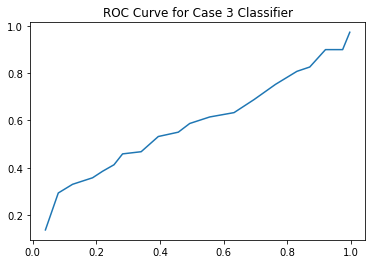

In [126]:
plt.plot(fpr_case3,tpr_case3)
plt.title("ROC Curve for Case 3 Classifier")
plt.show()

## Kmeans for Image Compression

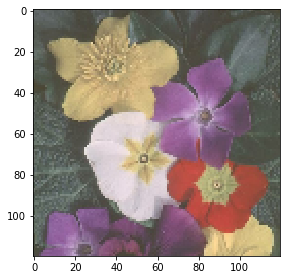

In [127]:
image = io.imread("/Users/harsh/Downloads/flowersm.ppm")
io.imshow(image)
io.show()

In [128]:
# converting image to matrix
rows = image.shape[0]
cols = image.shape[1]
image = image/255
X = image.reshape(image.shape[0]*image.shape[1],3)

In [129]:
# Euclidean distance function for kNN
def euclid(x1, x2):
    return (np.sqrt(np.dot(x1 - x2, x1 - x2)))

# function to perform k means clustering
def kmeans(x, k, imax = 50):
    # setting seed for replicability 
    np.random.seed(1)
    
    m = 1
    
    # randomly assigning each sample to one of the k clusters
    clust = np.random.choice(k, x.shape[0])
    
    mu = np.zeros((k, x.shape[1]))

    # finding cluster means
    for i in range(k):
        mu[i,:] = np.mean(x[np.where(clust == i),:])
       
    # flag to check if cluster labels have changed
    flag = 1
    
    per_mem_change = []
    per_mem_change.append(0)
    
    while flag == 1:
        cl_start = clust.copy()
        for j in range(x.shape[0]):
            y = np.zeros(k)
            for i in range(k):
                y[i] = euclid(x[j], mu[i])

            clust[j] = np.argmin(y)

        per_mem_change.append(1-np.sum(cl_start == clust)/x.shape[0])
        
        # stop when classification doesn't change anymore
        if (cl_start == clust).all():
            flag = 0
        else:
            flag = 1
            
        # resetting cluster means
        for i in range(k):
            if (len(np.where(clust == i)[0]) == 0):
                print("orphan cluster ", i)
            else:
                mu[i,:] = np.mean(x[np.where(clust == i)[0],:])
        
        m = m+1

        if(m == imax):
            break
    return clust, per_mem_change, m

In [130]:
X_256 = kmeans(X, 256)[0]

orphan cluster  1
orphan cluster  2
orphan cluster  3
orphan cluster  4
orphan cluster  6
orphan cluster  7
orphan cluster  9
orphan cluster  10
orphan cluster  11
orphan cluster  12
orphan cluster  13
orphan cluster  15
orphan cluster  18
orphan cluster  20
orphan cluster  21
orphan cluster  22
orphan cluster  23
orphan cluster  24
orphan cluster  25
orphan cluster  29
orphan cluster  30
orphan cluster  31
orphan cluster  32
orphan cluster  34
orphan cluster  35
orphan cluster  37
orphan cluster  38
orphan cluster  39
orphan cluster  41
orphan cluster  42
orphan cluster  43
orphan cluster  44
orphan cluster  45
orphan cluster  46
orphan cluster  47
orphan cluster  49
orphan cluster  51
orphan cluster  52
orphan cluster  54
orphan cluster  55
orphan cluster  57
orphan cluster  58
orphan cluster  59
orphan cluster  60
orphan cluster  61
orphan cluster  64
orphan cluster  67
orphan cluster  68
orphan cluster  70
orphan cluster  72
orphan cluster  73
orphan cluster  74
orphan cluster  75


In [131]:
X_128 = kmeans(X, 128)[0]

orphan cluster  1
orphan cluster  3
orphan cluster  4
orphan cluster  6
orphan cluster  7
orphan cluster  10
orphan cluster  13
orphan cluster  15
orphan cluster  18
orphan cluster  20
orphan cluster  21
orphan cluster  22
orphan cluster  23
orphan cluster  25
orphan cluster  26
orphan cluster  27
orphan cluster  29
orphan cluster  30
orphan cluster  31
orphan cluster  32
orphan cluster  33
orphan cluster  34
orphan cluster  36
orphan cluster  37
orphan cluster  39
orphan cluster  40
orphan cluster  41
orphan cluster  42
orphan cluster  43
orphan cluster  45
orphan cluster  51
orphan cluster  52
orphan cluster  54
orphan cluster  55
orphan cluster  57
orphan cluster  59
orphan cluster  61
orphan cluster  67
orphan cluster  68
orphan cluster  69
orphan cluster  70
orphan cluster  71
orphan cluster  72
orphan cluster  74
orphan cluster  75
orphan cluster  76
orphan cluster  77
orphan cluster  79
orphan cluster  80
orphan cluster  81
orphan cluster  82
orphan cluster  84
orphan cluster  8

In [132]:
X_64 = kmeans(X, 64)[0]

orphan cluster  1
orphan cluster  2
orphan cluster  3
orphan cluster  11
orphan cluster  12
orphan cluster  13
orphan cluster  14
orphan cluster  15
orphan cluster  20
orphan cluster  21
orphan cluster  22
orphan cluster  23
orphan cluster  24
orphan cluster  26
orphan cluster  27
orphan cluster  28
orphan cluster  32
orphan cluster  33
orphan cluster  34
orphan cluster  37
orphan cluster  38
orphan cluster  39
orphan cluster  42
orphan cluster  44
orphan cluster  46
orphan cluster  49
orphan cluster  51
orphan cluster  56
orphan cluster  59
orphan cluster  1
orphan cluster  2
orphan cluster  3
orphan cluster  11
orphan cluster  12
orphan cluster  13
orphan cluster  14
orphan cluster  15
orphan cluster  20
orphan cluster  21
orphan cluster  22
orphan cluster  23
orphan cluster  24
orphan cluster  26
orphan cluster  27
orphan cluster  32
orphan cluster  33
orphan cluster  34
orphan cluster  37
orphan cluster  38
orphan cluster  39
orphan cluster  42
orphan cluster  44
orphan cluster  46

In [133]:
X_32 = kmeans(X, 32)[0]

orphan cluster  5
orphan cluster  6
orphan cluster  9
orphan cluster  12
orphan cluster  14
orphan cluster  15
orphan cluster  19
orphan cluster  20
orphan cluster  23
orphan cluster  24
orphan cluster  27
orphan cluster  30
orphan cluster  5
orphan cluster  6
orphan cluster  9
orphan cluster  12
orphan cluster  14
orphan cluster  15
orphan cluster  19
orphan cluster  20
orphan cluster  23
orphan cluster  24
orphan cluster  27
orphan cluster  30
orphan cluster  5
orphan cluster  6
orphan cluster  9
orphan cluster  12
orphan cluster  15
orphan cluster  19
orphan cluster  20
orphan cluster  23
orphan cluster  24
orphan cluster  27
orphan cluster  30
orphan cluster  5
orphan cluster  6
orphan cluster  9
orphan cluster  12
orphan cluster  15
orphan cluster  19
orphan cluster  20
orphan cluster  23
orphan cluster  24
orphan cluster  27
orphan cluster  30
orphan cluster  5
orphan cluster  6
orphan cluster  9
orphan cluster  12
orphan cluster  15
orphan cluster  19
orphan cluster  20
orphan c

In [134]:
print(X_32)

[22 22 22 ... 14 14 28]


In [135]:
def centroids(X, labels):
    k = np.unique(labels)
    centers = np.zeros((len(k), X.shape[1]))
    X_1 = np.zeros((X.shape[0], X.shape[1]))
    for i in range(len(k)):
        centers[i,:] = np.mean(X[np.where(labels == i)], axis = 0)
    for i in range(len(k)):
        X_1[np.where(labels == i)] = centers[i]
    return centers, X_1

In [136]:
def rmse(X1, X2):
    return np.sqrt(np.nanmean(np.abs(X1-X2)))

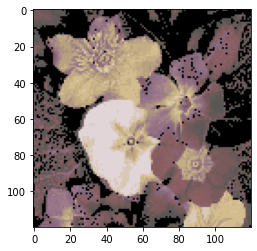

In [137]:
img_new = np.reshape(compressed_32[1], (120,120,3)) 
plt.imshow(img_new)

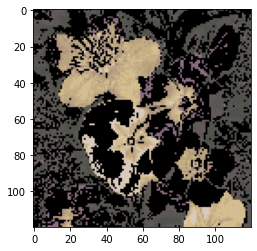

In [138]:
img_new = np.reshape(compressed_64[1], (120,120,3)) 
plt.imshow(img_new)

In [143]:
# Recreating images
compressed_32 = centroids(X, X_32)
compressed_64 = centroids(X, X_64)
compressed_128 = centroids(X, X_128)
compressed_256 = centroids(X, X_256)

img_new_32 = np.reshape(compressed_32[1], (120,120,3)) 
img_new_64 = np.reshape(compressed_64[1], (120,120,3)) 
img_new_128 = np.reshape(compressed_128[1], (120,120,3)) 
img_new_256 = np.reshape(compressed_256[1], (120,120,3)) 

# RMSE
print(rmse(img_new_32, image))
print(rmse(img_new_64, image))
print(rmse(img_new_128, image))
print(rmse(img_new_256, image))

0.3306972411347827
0.49096235507810465
0.4977396688809307
0.5770321543451606


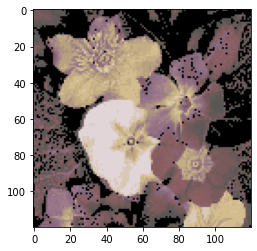

In [140]:
plt.imshow(img_new_32)

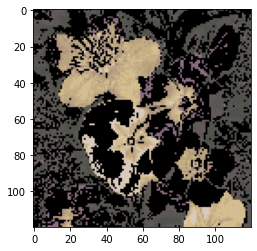

In [141]:
plt.imshow(img_new_64)

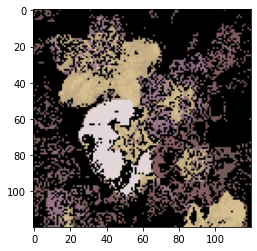

In [144]:
plt.imshow(img_new_128)

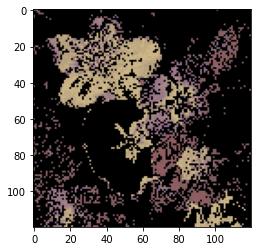

In [145]:
plt.imshow(img_new_256)

In [155]:
# function to perform k means clustering with wta
def wta_kmeans(x, k, lp = 0.01, imax = 20):
    # setting seed for replicability 
    np.random.seed(1)
    
    m = 1
    
    # randomly assigning each sample to one of the k clusters
    clust = np.random.choice(k, x.shape[0])
    
    mu = np.zeros((k, x.shape[1]))

    # finding cluster means
    for i in range(k):
        mu[i,:] = np.mean(x[np.where(clust == i),:])
       
    # flag to check if cluster labels have changed
    flag = 1
    
    per_mem_change = []
    per_mem_change.append(0)
    
    while flag == 1:
        cl_start = clust.copy()
        for j in range(x.shape[0]):
            y = np.zeros(k)
            for i in range(k):
                y[i] = euclid(x[j], mu[i])

            clust[j] = np.argmin(y)
            
        per_mem_change.append(1-np.sum(cl_start == clust)/x.shape[0])
        
        # stop when classification doesn't change anymore
        if (cl_start == clust).all():
            flag = 0
        else:
            flag = 1
            
        # resetting cluster means
        for i in range(k):
            if (len(np.where(clust == i)[0]) == 0):
                print("orphan cluster ", i)
            else:
                mu[i] = mu[i] + lp*(x[j] - mu[i])
        
        m = m+1

        if(m == imax):
            flag = 0
            break
    return clust, per_mem_change, m

In [156]:
X_32 = wta_kmeans(X, 32)[0]

orphan cluster  5
orphan cluster  6
orphan cluster  9
orphan cluster  12
orphan cluster  14
orphan cluster  15
orphan cluster  19
orphan cluster  20
orphan cluster  23
orphan cluster  24
orphan cluster  27
orphan cluster  30
orphan cluster  6
orphan cluster  9
orphan cluster  15
orphan cluster  19
orphan cluster  23
orphan cluster  4
orphan cluster  12
orphan cluster  18
orphan cluster  19
orphan cluster  20
orphan cluster  26
orphan cluster  30
orphan cluster  2
orphan cluster  5
orphan cluster  12
orphan cluster  15
orphan cluster  18
orphan cluster  20
orphan cluster  24
orphan cluster  26
orphan cluster  27
orphan cluster  5
orphan cluster  6
orphan cluster  9
orphan cluster  15
orphan cluster  23
orphan cluster  26
orphan cluster  29
orphan cluster  2
orphan cluster  6
orphan cluster  12
orphan cluster  18
orphan cluster  19
orphan cluster  20
orphan cluster  26
orphan cluster  30
orphan cluster  2
orphan cluster  12
orphan cluster  15
orphan cluster  2
orphan cluster  5
orphan cl

In [157]:
X_64 = wta_kmeans(X, 64)[0]

orphan cluster  1
orphan cluster  2
orphan cluster  3
orphan cluster  11
orphan cluster  12
orphan cluster  13
orphan cluster  14
orphan cluster  15
orphan cluster  20
orphan cluster  21
orphan cluster  22
orphan cluster  23
orphan cluster  24
orphan cluster  26
orphan cluster  27
orphan cluster  28
orphan cluster  32
orphan cluster  33
orphan cluster  34
orphan cluster  37
orphan cluster  38
orphan cluster  39
orphan cluster  42
orphan cluster  44
orphan cluster  46
orphan cluster  49
orphan cluster  51
orphan cluster  56
orphan cluster  59
orphan cluster  2
orphan cluster  12
orphan cluster  13
orphan cluster  14
orphan cluster  15
orphan cluster  20
orphan cluster  21
orphan cluster  24
orphan cluster  27
orphan cluster  32
orphan cluster  34
orphan cluster  44
orphan cluster  50
orphan cluster  51
orphan cluster  1
orphan cluster  3
orphan cluster  8
orphan cluster  11
orphan cluster  12
orphan cluster  19
orphan cluster  21
orphan cluster  22
orphan cluster  23
orphan cluster  26


In [158]:
X_128 = wta_kmeans(X, 128)[0]

orphan cluster  1
orphan cluster  3
orphan cluster  4
orphan cluster  6
orphan cluster  7
orphan cluster  10
orphan cluster  13
orphan cluster  15
orphan cluster  18
orphan cluster  20
orphan cluster  21
orphan cluster  22
orphan cluster  23
orphan cluster  25
orphan cluster  26
orphan cluster  27
orphan cluster  29
orphan cluster  30
orphan cluster  31
orphan cluster  32
orphan cluster  33
orphan cluster  34
orphan cluster  36
orphan cluster  37
orphan cluster  39
orphan cluster  40
orphan cluster  41
orphan cluster  42
orphan cluster  43
orphan cluster  45
orphan cluster  51
orphan cluster  52
orphan cluster  54
orphan cluster  55
orphan cluster  57
orphan cluster  59
orphan cluster  61
orphan cluster  67
orphan cluster  68
orphan cluster  69
orphan cluster  70
orphan cluster  71
orphan cluster  72
orphan cluster  74
orphan cluster  75
orphan cluster  76
orphan cluster  77
orphan cluster  79
orphan cluster  80
orphan cluster  81
orphan cluster  82
orphan cluster  84
orphan cluster  8

In [159]:
X_256 = wta_kmeans(X, 256)[0]

orphan cluster  1
orphan cluster  2
orphan cluster  3
orphan cluster  4
orphan cluster  6
orphan cluster  7
orphan cluster  9
orphan cluster  10
orphan cluster  11
orphan cluster  12
orphan cluster  13
orphan cluster  15
orphan cluster  18
orphan cluster  20
orphan cluster  21
orphan cluster  22
orphan cluster  23
orphan cluster  24
orphan cluster  25
orphan cluster  29
orphan cluster  30
orphan cluster  31
orphan cluster  32
orphan cluster  34
orphan cluster  35
orphan cluster  37
orphan cluster  38
orphan cluster  39
orphan cluster  41
orphan cluster  42
orphan cluster  43
orphan cluster  44
orphan cluster  45
orphan cluster  46
orphan cluster  47
orphan cluster  49
orphan cluster  51
orphan cluster  52
orphan cluster  54
orphan cluster  55
orphan cluster  57
orphan cluster  58
orphan cluster  59
orphan cluster  60
orphan cluster  61
orphan cluster  64
orphan cluster  67
orphan cluster  68
orphan cluster  70
orphan cluster  72
orphan cluster  73
orphan cluster  74
orphan cluster  75


In [160]:
compressed_32 = centroids(X, X_32)
compressed_64 = centroids(X, X_64)

# Recreating images
compressed_32 = centroids(X, X_32)
compressed_64 = centroids(X, X_64)
compressed_128 = centroids(X, X_128)
compressed_256 = centroids(X, X_256)

img_new_32 = np.reshape(compressed_32[1], (120,120,3)) 
img_new_64 = np.reshape(compressed_64[1], (120,120,3)) 
img_new_128 = np.reshape(compressed_128[1], (120,120,3)) 
img_new_256 = np.reshape(compressed_256[1], (120,120,3)) 

# RMSE
print(rmse(img_new_32, image))
print(rmse(img_new_64, image))
print(rmse(img_new_128, image))
print(rmse(img_new_256, image))

0.48003847488604934
0.26677243225926844
0.33567252092311284
0.5535447764228728


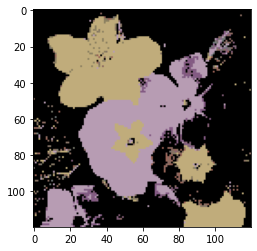

In [161]:
plt.imshow(img_new_32)

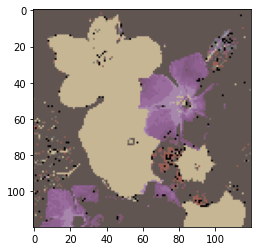

In [162]:
plt.imshow(img_new_64)

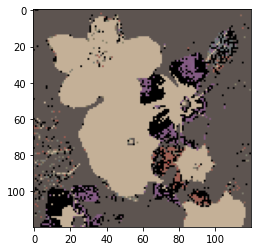

In [163]:
plt.imshow(img_new_128)

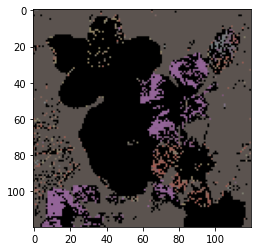

In [164]:
plt.imshow(img_new_256)